
<p>
<h1><b><center>Mecánica de Medios Continuos</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 2</center></b><h2>
<h3><b><center>Atmósfera Empírica</center></b><h3>
<h5><center><b>Asignada</b>: 29 de Agosto de 2023</center><h5>
<h5><center><b>Entrega</b>: 12 de Septiembre de 2023</center><h5>
</p>

<hr/>
<b>Nombre</b>: Manuela Góez Estepa
<br/>
<b>Última actualización</b>:
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es comparar los distintos modelos de atmósferas vistos en el curso, frente al modelo de atmósfera empírica [NRLMSISE-00](https://en.wikipedia.org/wiki/NRLMSISE-00) (_US Naval Research Laboratory mass spectrometer and incoherent scatter radar_). Este modelo puede darnos información de la atmósfera en distintas ubicaciones en la Tierra, épocas del año, horas del día e incluso épocas del ciclo solar.  Hay un paquete en `Python` que permite obtener datos del modelo. Una explicación del paquete puede encontrarse en el [Notebook de modelos atmosféricos del profesor](https://colab.research.google.com/drive/1qVHeDc6lWg6bQP0o1msNaVb9TT6cgHeT?usp=sharing)







**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráficos de cada punto.

- Datos mínimos:
  - Los números solicitados en cada punto.

- Gráficos opcionales:
  - Gráfico de $h_0$ como función de la latitud geográfica.
  - Gráfico de $h_0$ como función de la fecha del año en una ciudad de latitud alta.
  - Gráfico de $h_0$ como función del año durante el ciclo solar en una ciudad de latitud alta.
  - Gráfico de la densidad atmosférica en la mesosfera ($z=100$ km) como función del año durante el ciclo solar en una ciudad de latitud alta.

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

## 1. Obtener los datos de la atmósfera desde la superficie hasta 100 km en una ubicación, fecha y hora específica cada 50 metros.  Para ello puede usar el día y lugar de nacimiento. Asuma para la hora de nacimiento las 12 m (medio día).

In [ ]:
#Instalaciones
!pip install -q nrlmsise00
!pip install -qU 'nrlmsise00[dataset]'
!pip install -q spaceweather

#Para la masa de los elementos
!pip install -q periodictable

In [ ]:
#Librerías

from nrlmsise00.dataset import msise_4d
from datetime import datetime
import spaceweather as sw
#NRLMSISE-00 usa datos del clima espacial.  Esos datos tienen que actualizarse
sw.update_data()

import numpy as np
import matplotlib.pyplot as plt
import periodictable
import pandas as pd

from scipy.constants import gas_constant,atm  #constantes
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

import warnings


/usr/local/lib/python3.10/dist-packages/nrlmsise00/dataset/__init__.py:27: UserWarning: The xarray 4d interface is experimental.
  warn("The xarray 4d interface is experimental.", UserWarning)


In [ ]:
#Altura máxima
hmax = 1e5 #100 km en

#Ubicación Hospital General de Medellí
latitud = 6.23
longitud = -75.57

#Altura
zs=np.arange(0,hmax,50) # m

ds = msise_4d(datetime(2001,6,6,12,0,0),zs/1e3,latitud,longitud)

/usr/local/lib/python3.10/dist-packages/nrlmsise00/dataset/core.py:74: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  return df.loc[t.floor("D")]
/usr/local/lib/python3.10/dist-packages/nrlmsise00/dataset/core.py:74: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  return df.loc[t.floor("D")]
/usr/local/lib/python3.10/dist-packages/nrlmsise00/dataset/core.py:74: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  return df.loc[t.floor("D")]


In [ ]:
ds

<xarray.Dataset>
Dimensions:  (time: 1, alt: 2000, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 2001-06-06T12:00:00
  * alt      (alt) float64 0.0 0.05 0.1 0.15 0.2 ... 99.75 99.8 99.85 99.9 99.95
  * lat      (lat) float64 6.23
  * lon      (lon) float64 -75.57
Data variables: (12/15)
    He       (time, alt, lat, lon) float64 1.277e+14 1.271e+14 ... 9.886e+07
    O        (time, alt, lat, lon) float64 0.0 0.0 0.0 ... 4.375e+11 4.362e+11
    N2       (time, alt, lat, lon) float64 1.903e+19 1.895e+19 ... 7.885e+12
    O2       (time, alt, lat, lon) float64 5.105e+18 5.083e+18 ... 1.611e+12
    Ar       (time, alt, lat, lon) float64 2.276e+17 2.266e+17 ... 7.876e+10
    rho      (time, alt, lat, lon) float64 0.001171 0.001166 ... 4.689e-10
    ...       ...
    Texo     (time, alt, lat, lon) float64 1.027e+03 1.027e+03 ... 1.027e+03
    Talt     (time, alt, lat, lon) float64 299.1 298.7 298.3 ... 178.9 179.1
    lst      (time, lon) float64 6.962
    Ap       (time) int32 6
    f107     (time) float64 153.4
    f107a    (time) float64 156.2

In [ ]:
ρs_emp=np.array(ds["rho"]).flatten()
Ts_emp=np.array(ds["Talt"]).flatten()

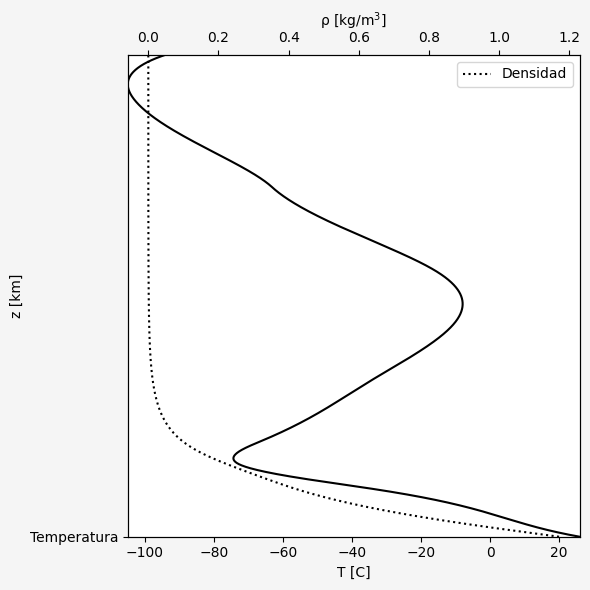

In [ ]:
fig,ax=plt.subplots(figsize=(6,6),facecolor = "whitesmoke")

#Presión
ax.plot(Ts_emp-273.15,zs/1e3,'k-', "Temperatura")

#Densidad
axd=ax.twiny()
axd.plot(ρs_emp*1e3,zs/1e3,'k:',label='Densidad')

#Decoración
axd.legend()
ax.set_xlabel("T [C]")
ax.set_ylabel("z [km]")
axd.set_xlabel("ρ [kg/m$^3$]")
ax.margins(0,0)
#ax.set_ylim(0,hmax/1e3)
fig.tight_layout()

## 2. Usando los datos de composición de la atmósfera, calcule la presión atmosférica a cada altura. Asuma para ello la ecuación de estado de gas ideal.  Haga gráficos de temperatura, densidad y presión con la altura, usando la convención en ciencias atmosféricas de poner la altura en el eje y.

Trabajar con los nombres específicos puede ser más entendible pero hace el manejo de la información menos eficiente, para ello, definamos el orden de los elementos como $He,O,N_2,O_2,Ar,H,N$, que es el mismo orden en que aparecen en la tabla original; ahora creamos un arreglo que contenga la composicion para cada altura, en éste, las filas serán el elemento (ejemplo, $He$ corresponde al índice [0]) y las columnas serán las n-ésimas alturas definidas en zs.Obtenemos la composición de la atmósfera:

In [ ]:
composicion = np.array([np.array(ds[elemento]).flatten() for elemento in ["He","O","N2","O2","Ar","H","N"]])

Para calcular la presión, se usa la ecuación de estado del gas ideal es su forma:

$$PV=nR_{mol}T$$

donde $n$ es la densidad de moles, dada como $n=M/M_{mol}$ y la constante de los gases $R_{mol}=8.31447 JK^{-1}mol^{-1}$.

Pero como de la atmósfera empírica ya se tienen valores de densidad $\rho=M/V$, entonces es más conveniente usar la forma:

$$P=\frac{\rho}{M_{mol}}R_{mol}T$$

Para hallar la masa molar se debe tener la masa atómica. Preguntándole a ChatGPT *Which libraries in python can give the atomic mass?* se obtiene la recomendación de *periodictable*.

In [ ]:
#Las masas de los elementos
Helio = periodictable.He
Oxigeno = periodictable.O
Nitrogeno = periodictable.N
Argon = periodictable.Ar
Hidrogeno = periodictable.H

In [ ]:
#Hacemos un arreglo con las masas de las moléculas en el mismo orden de la composición de los elementos

masas_atom = np.array([Helio.mass,Oxigeno.mass,2*Nitrogeno.mass,2*Oxigeno.mass,Argon.mass,Hidrogeno.mass,Nitrogeno.mass])

Notemos que para cada altura, hay una cantidad distinta de estos elemento, por lo tanto, se debe obtener una masa molar promedio para cada diferencial de altura. De la tabla inicial, se obtiene es la cantidad del elemento, por lo tanto la masa molar debe tomarse como un promedio pesado, donde el peso es "la abundancia" del elemento, y que se debe dividir entre la suma total de cantidades de las moléculas.

In [ ]:
Mmol_mean = np.zeros(len(zs))    #Se guardarán los valores de masa molar promedio para cada altura

for altura in range(len(zs)):
  masa_molar = 0
  cantidad_total = 0

  for elemento in range(len(composicion)):
    masa_molar += composicion[elemento,altura] * masas_atom[elemento]
    cantidad_total += composicion[elemento,altura]

  promedio_ponderado = masa_molar / cantidad_total         #Este paso se puede evitar, pero es para dar claridad al calculo del promedio

  Mmol_mean[altura] = promedio_ponderado


In [ ]:
#De la librería Scipy

R = gas_constant   #JK^-1mol^-1

In [ ]:
#La presión se halla como:

P_emp = ρs_emp*1e3 / (Mmol_mean/1e3) * Ts_emp * R  #densidad en kg/m3 y Mmol en kg/mol

#queda la presión en Pascales

Graficos de presión, densidad y temperatura en función de la altura.

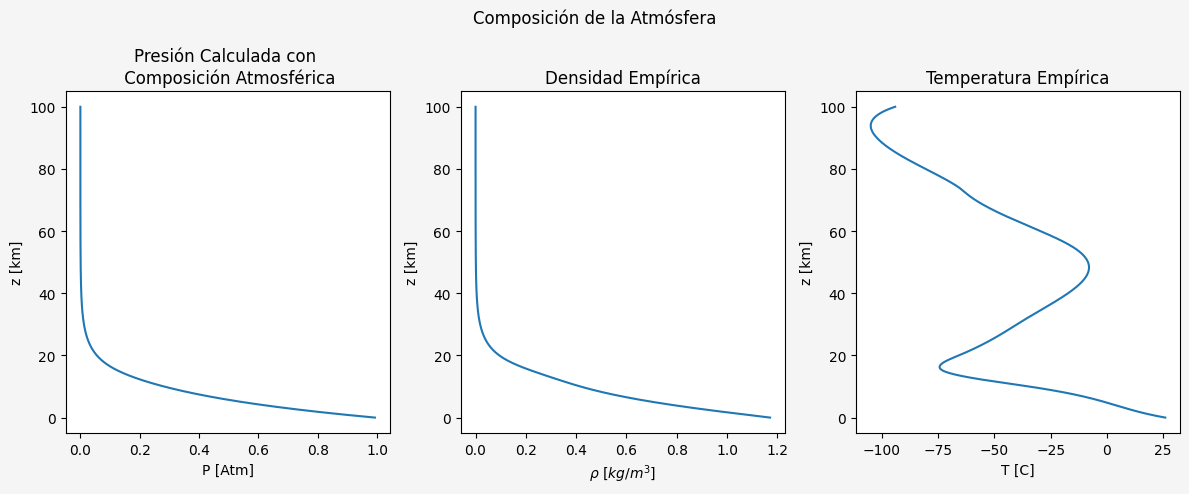

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,5), facecolor = "whitesmoke")
fig.suptitle('Composición de la Atmósfera')

#_________________
ax1.plot(P_emp/atm , zs/1e3)
ax1.set_title("Presión Calculada con \n Composición Atmosférica")
ax1.set_xlabel("P [Atm]")
ax1.set_ylabel("z [km]")

#_________________
ax2.plot(ρs_emp *1e3 , zs/1e3)
ax2.set_title("Densidad Empírica")
ax2.set_xlabel(r"$\rho \ [kg / m^3]$")
ax2.set_ylabel("z [km]")

#_________________
ax3.plot(Ts_emp -273.15,  zs/1e3)
ax3.set_title("Temperatura Empírica")
ax3.set_xlabel("T [C]")
ax3.set_ylabel("z [km]")

fig.tight_layout()



## 3. Llamamos tropopausa a la altura en la atmósfera en la que la temperatura deja de disminuir con la altura. Encuentre la altura de la **tropopausa**. A la capa de la atmósfera debajo de esa altura se la llama la **troposfera**. Investiga otras capas de la atmósfera hasta 100 km e identificalas en los gráficos en 2. Haz un gráfico de temperatura como función de la altura e identifica en ese gráfico los límites de cada capa y el nombre de las capas.

Para hallar los cambios de concavidad (puntos de inflexión) se usa una función de *scipy.signals*, llamada *find_peaks*, ésta es implementada en el análisis de señales para hallar los picos máximos, de modo, que para encontrar los mínimos, basta buscar los picos en la función reflejada (multiplicando por -1).

In [ ]:
#Para obtener los índices de los cambios de concavidad
peaks, _ = find_peaks(Ts_emp)
peaks1, _ = find_peaks(-Ts_emp)

#Uniendo todos los picos en un solo arreglo y ordenados

Picos = np.sort( np.concatenate((peaks,peaks1)) )

La tropopausa corresponde al cambio de concavidad con altura más baja:

In [ ]:
print(f"La tropopausa se encuentra a {zs[Picos[0]]/1e3} km de la superficie.")

La tropopausa se encuentra a 16.25 km de la superficie.


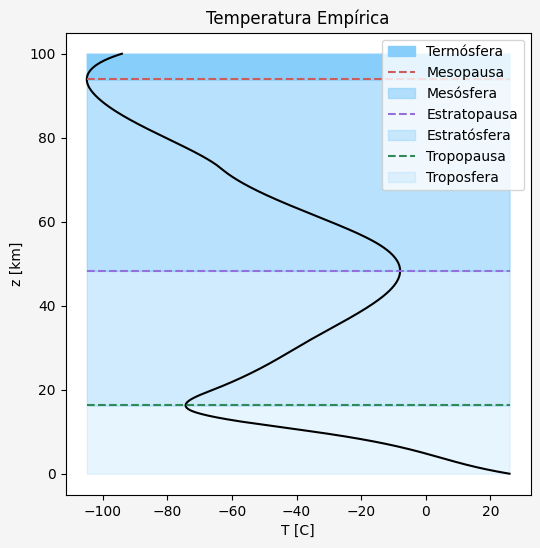

In [ ]:
plt.figure(figsize=(6,6),facecolor="whitesmoke")

#Temperatura
plt.plot(Ts_emp -273.15,  zs/1e3, color = "black")

#Cuarta capa
plt.fill_between(np.sort(Ts_emp) - 273.15,zs[Picos[2]]/1e3,max(zs)/1e3,
                 color = "lightskyblue",alpha = 1,label = "Termósfera")

#Tercera capa
plt.hlines(zs[Picos[2]]/1e3, min(Ts_emp) -273.15,max(Ts_emp) -273.15,
           color = "indianred",linestyle = "--",label = "Mesopausa")

plt.fill_between(np.sort(Ts_emp) - 273.15,zs[Picos[1]]/1e3,zs[Picos[2]]/1e3,
                 color = "lightskyblue",alpha = 0.6,label = "Mesósfera")

#Segunda capa
plt.hlines(zs[Picos[1]]/1e3, min(Ts_emp) -273.15,max(Ts_emp) -273.15,
           color = "mediumpurple",linestyle = "--",label = "Estratopausa")

plt.fill_between(np.sort(Ts_emp) - 273.15,zs[Picos[0]]/1e3,zs[Picos[1]]/1e3,
                 color = "lightskyblue",alpha = 0.4,label = "Estratósfera")

#Primera capa
plt.hlines(zs[Picos[0]]/1e3, min(Ts_emp) -273.15,max(Ts_emp) -273.15,
           color = "seagreen",linestyle = "--",label = "Tropopausa")

plt.fill_between(np.sort(Ts_emp) - 273.15,0,zs[Picos[0]]/1e3,
                 color = "lightskyblue",alpha = 0.2,label = "Troposfera")

plt.title("Temperatura Empírica")
plt.xlabel("T [C]")
plt.ylabel("z [km]")
plt.legend()

La información a continuación expuesta sobre las capas de la atmósfera fue recopilada de las siguientes fuentes:

[1] La atmófera. (s.f). Cambio Climático Global. https://cambioclimaticoglobal.com/atmosfe1

[2] La composición de la Atmósfera. (s.f).https://www.imn.ac.cr/documents/10179/27818/Comp-atmosfera.pdf/996a94d5-ec7c-478f-91ec-d465d8cab5f8#:~:text=La%20atm%C3%B3sfera%20se%20estructura%20en,18%20km%20en%20el%20ecuador.

[3] Ionosphere. (s.f).Space Place Nasa. https://spaceplace.nasa.gov/ionosphere/sp/#:~:text=Es%20el%20%C3%A1rea%20alrededor%20de,es%20donde%20suceden%20las%20auroras.

**Capas en la Atmósfera**

La atmósfera terrestre se divide en capas debido a cambios en la temperatura y presión según la altura con respecto a la superficie, ello también lleva a una diversa composición química gracias a la distribución de los gases presentes.

Las capas principales son: La Termósfera, Mesósfera, Estratósfera y tropósfera. No obstante, la separación entre ellas se hace mediante límites que conocemos como: La tropopausa, Estropausa y Mesopausa.

La *Tropósfera* empieza en la superficie y puede llegar de 8 km en los polos a 18 km cerca al Ecuador. Ésta posee alrededor de tres cuartas partes de los gases de la atmósfera[1], principalmente $N_2$ y $O_2$, incluso se estima que el 99% de todos los gases de la atmófera están por debajo de los 30 km [2]. El final de esta zona es la *Tropopausa* (donde no hay movimientos significativos del aire, lo que le hace la región predilecta para el vuelo de aviones [2]) y marca la altura desde la que comienza a aumentar la temperatura debido a la radiación UV [2]en la conocida como *Estratósfera* que abarca de los 20 a 50 km de altura en promedio, punto en el que inicia la Estratopausa, que nuevamente marca un cambio en el comportamiento de temperatura, donde ésta nuevamente disminuye hasta los -100C a lo largo de la extensión de la *Mesósfera* entre los 50 y 80 km. Luego, la atmósfera finaliza con la *Termósfera* o  *Ionósfera*, en ésta, la temperatura crece desmedidamente al absorber energía del sol e ionizar las partículas allí presentes [3], aunque también se caracteriza por una densidad baja de gases en comparación al resto de la atmósfera.



## 4. Haga un ajuste de la densidad atmosférica empírica como función de la altura en la tropósfera, usando el modelo isotérmico. Determine, por tanto, el valor de $h_0$ y $\rho_0$ que mejor se ajustan al perfil de densidad empírico.



En primer lugar, cabe resaltar que no se puede usar un modelo isotérmico para describir toda la atmósfera, pues, como justamente se vio en el item anterior la temperatura crece y decrece por múltiples factores asociados no sólo a la altura, sino a fenómenos de radiación solar, composición química, etcétera.

De modo que el siguiente ajuste se restringe a la tropósfera, donde a pesar de no observarse una temperatura constante, se puede encontrar que la densidad se comporta como se esperaría en el modelo isotérmico.

Para el modelo de atmósfera plano-paralela isotérmica, se tiene que la densidad en función de la altura puede ser expresada como:

$$\rho = \rho_0 e^{-z/h_0}$$

Ecuación tomada de la presentación de clase
*MCON - Clase 7 - 2023-2 - Atmósferas* en la diapositiva 29.

In [ ]:
def isotermico(z,rho0,h0):
  return rho0*np.exp(-z/h0)

Observemos primero la tropósfera:

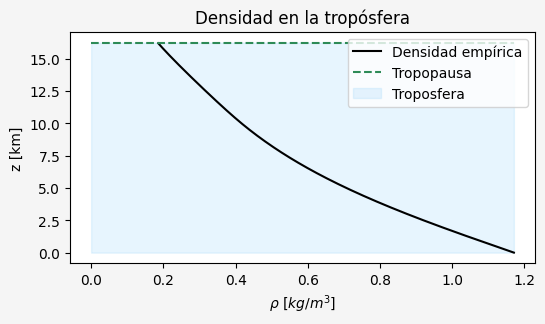

In [ ]:
plt.figure(figsize=(6,3),facecolor="whitesmoke")

#Temperatura
plt.plot(ρs_emp[:Picos[0]]*1e3,  zs[:Picos[0]]/1e3,
         color = "black", label = "Densidad empírica")

#Troposfera
plt.hlines(zs[Picos[0]]/1e3, min(ρs_emp)*1e3,max(ρs_emp)*1e3,
           color = "seagreen",linestyle = "--",label = "Tropopausa")

plt.fill_between(np.sort(ρs_emp)*1e3,0,zs[Picos[0]]/1e3,
                 color = "lightskyblue",alpha = 0.2,label = "Troposfera")

plt.title("Densidad en la tropósfera")
plt.xlabel(r"$\rho \ [kg / m^3]$")
plt.ylabel("z [km]")
plt.legend()

In [ ]:
#El ajuste solo se debe realizar hasta el punto de la tropósfera

zs_trop = zs[:Picos[0]]
ρs_trop = ρs_emp[:Picos[0]]

Al realizar el ajuste dando la función directamente no se logró una convergencia con los algoritmos de ajuste, por lo tanto, se busca la alternativa de linealizar la función con intención de facilitar el ajuste.

Se linealiza la ecuación exponencial como:

\begin{align}
\rho &= \rho_0 e^{-z/h_0} \\
ln(\rho) &= ln(\rho_0 e^{-z/h_0})\\
ln(\rho) &= ln(\rho_0)-\frac{z}{h_0}\\
\end{align}

Así podemos definir una relación lineal  $y=mx+b$ donde $y=ln(\rho)$, $m=-\frac{1}{h_0}$ y $b=ln(\rho_0)$.

Ahora sí se procede a hacer el ajuste.

In [ ]:
def lineal(x,m,b):
  return m*x+b

In [ ]:
#Ajuste
popt, pcov = curve_fit(lineal, zs_trop, np.log(ρs_trop))

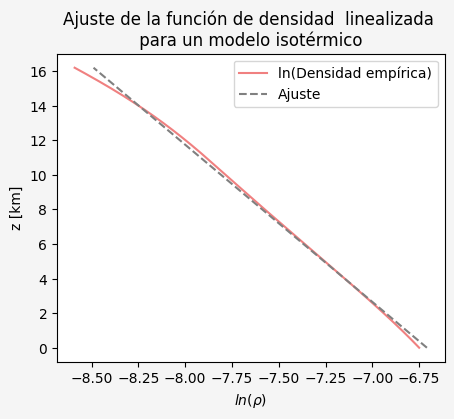

In [ ]:
plt.figure(figsize=(5,4),facecolor="whitesmoke")

#Empirica
plt.plot(np.log(ρs_trop),  zs_trop/1e3,
         color = "lightcoral", label = "ln(Densidad empírica)")

#Ajuste
plt.plot(lineal(zs_trop,*popt),zs_trop/1e3,"--",
         color = "gray", label = "Ajuste")

plt.title("Ajuste de la función de densidad  linealizada \n para un modelo isotérmico ")
plt.xlabel(r"$ln(\rho) $")
plt.ylabel("z [km]")
plt.legend()

Recordemos que tal ajuste me proporciona los parámetros $m,b$, por lo que para recuperar los valores buscados en la función exponencial se tiene que:

\begin{align}
h_0 & = -\frac{1}{m} \\
\rho_0 &= e^{b}
\end{align}

In [ ]:
h0_opt = -1/popt[0]
ρ_opt = np.exp(popt[1])

ρ_ajustado = isotermico(zs_trop,ρ_opt,h0_opt)

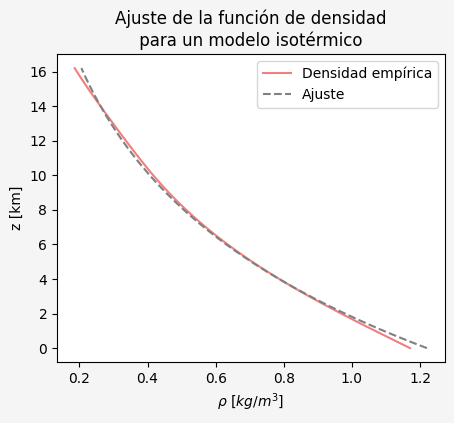

In [ ]:
plt.figure(figsize=(5,4),facecolor="whitesmoke")

#Empirica
plt.plot(ρs_trop*1e3,  zs_trop/1e3,
         color = "lightcoral", label = "Densidad empírica")

#Ajuste
plt.plot(ρ_ajustado*1e3,zs_trop/1e3,"--",
         color = "gray", label = "Ajuste")

plt.title("Ajuste de la función de densidad\n para un modelo isotérmico ")
plt.xlabel(r"$\rho \ [kg / m^3]$")
plt.ylabel("z [km]")
plt.legend()

## 5. Con ese valor de $\rho_0$ y $h_0$ grafique la presión esperada según el modelo isotérmico. Para ello use el valor de $p_0$ que se sigue de la definición $h_0 = p_0/(\rho_0 g_0)$ y por otro lado la presión superficial empírica. Compare ambas curvas con la curva de presión empírica.



Teniendo los valores de densidad ajustados al modelo isotérmico y las alturas relacionadas a la tropósfera, se puede encontrar la presión como:

$$P_0 = h_0 \rho_0 g_0$$

In [ ]:
#Valor de la gravedad
g_0 = 9.81 #m/s^2

#Presión para el modelo
P_trop = h0_opt * (ρ_ajustado*1e3) * g_0  #la densidad tiene que quedar en kg

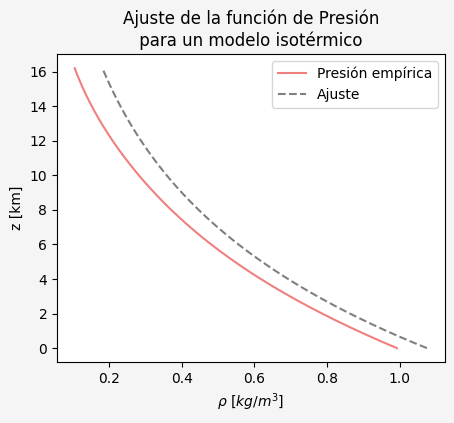

In [ ]:
plt.figure(figsize=(5,4),facecolor="whitesmoke")

#Empirica
plt.plot(P_emp[:Picos[0]]/atm,  zs_trop/1e3,
         color = "lightcoral", label = "Presión empírica")

#Ajuste
plt.plot(P_trop/atm, zs_trop/1e3,"--",
         color = "gray", label = "Ajuste")

plt.title("Ajuste de la función de Presión\n para un modelo isotérmico ")
plt.xlabel(r"$\rho \ [kg / m^3]$")
plt.ylabel("z [km]")
plt.legend()

## 6. Repita el procedimiento anterior pero con el modelo homentrópico. El ajuste a la curva de densidad le debe devolver el valor de 3 parámetros, $\rho_0$, $h_2$ y $\gamma$. Deduzca con estos valores un nuevo valor para $h_0$ y compárelo con el que obtuvo en 4. Con estos parámetros haga como hizo en 5 curvas de presión como función de la altura y compare con el modelo empírico.



En el caso de una atmósfera plano-paralela homentrópica, la expresión para la densidad es:

$$\rho = \rho_0 \left( 1-\frac{z}{h_2}\right)^{1/(\gamma-1)}$$

donde $h_2 = \frac{\gamma}{\gamma-1}h_0$. En este caso linealizar puede ser un proceso más complicado $m$ y $b$ quedan con términos mixtos entre $\rho,\gamma,h_0$.


Ecuación tomada de la presentación de clase
*MCON - Clase 7 - 2023-2 - Atmósferas* en la diapositiva 64 y 59.

In [ ]:
def homentropico(z,rho0,h0,gamma):
  h2 = gamma / ( gamma - 1) * h0
  return rho0 * (1 - z / h2)**(1 / ( gamma - 1 ))

Sin embargo, como en el modelo anterior, ya se pudieron obtener unos valores de $\rho$ y $h_0$, entonces se pueden pasar éstos como punto inicial para empezar el ajuste y hacer el trabajo más óptimo.

In [ ]:
#Ajuste

#7/5 poniendo el valor de gamma de un gas diatómico
popt, pcov = curve_fit(homentropico, zs_trop, ρs_trop,(ρ_opt,h0_opt,7/5))

In [ ]:
ρ_ajustado_hom = homentropico(zs_trop, *popt)

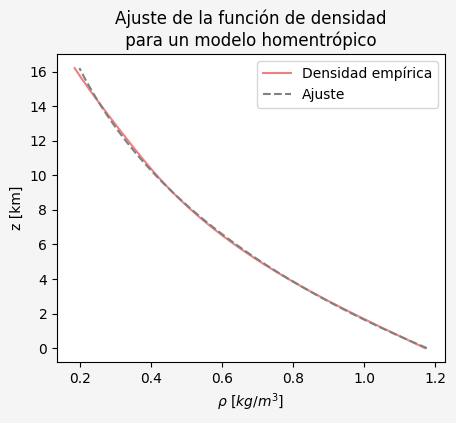

In [ ]:
plt.figure(figsize=(5,4),facecolor="whitesmoke")

#Empirica
plt.plot(ρs_trop*1e3,  zs_trop/1e3,
         color = "lightcoral", label = "Densidad empírica")

#Ajuste
plt.plot(ρ_ajustado_hom*1e3,zs_trop/1e3,"--",
         color = "gray", label = "Ajuste")

plt.title("Ajuste de la función de densidad\n para un modelo homentrópico ")
plt.xlabel(r"$\rho \ [kg / m^3]$")
plt.ylabel("z [km]")
plt.legend()

## 7. ¿Dependerá el valor de $h_0$ del lugar en la Tierra en el que estás el mismo día de tu nacimiento?. Repita el procedimiento 6 para otras 3 ciudades (aquellas a las que te soñarías viajar), ojala de latitudes geográficas diversas, es decir, cerca al ecuador, pero también en latitudes altas, al norte o al Sur ¿qué observas? ¿cómo lo interpretas?



Ahora que ya se hizo todo el procedimiento en general para un lugar y fecha especificado, se pueden resumir todas estas funciones dentro de una clase:


Cabe aclarar que todas las funciones propuestas en la clase corresponden al código usado anteriormente, y los ajustes son equivalentes a los del punto 4, 5 y 6.


In [ ]:
class Atmosfera:
  """La siguiente clase recibe una fecha (en el medio dia)
  y una ubicación para extraer datos atmosféricos, también
  hace el ajuste de densidad para la Tropósfera"""

  def __init__(self,año,mes,dia,zs,latitud,longitud):
    ds = msise_4d(datetime(año,mes,dia,12,0,0),zs/1e3,latitud,longitud)
    self.zs = zs
    self.ρs_emp = np.array(ds["rho"]).flatten()
    self.Ts_emp = np.array(ds["Talt"]).flatten()
    self.composicion = np.array([np.array(ds[elemento]).flatten() for
                                 elemento in ["He","O","N2","O2","Ar","H","N"]])

  def densidad(self):
    return self.ρs_emp

  def m_molar(self):


    Mmol_mean = np.zeros(len(zs))

    for altura in range(len(zs)):
      masa_molar = 0
      cantidad_total = 0

      for elemento in range(len(self.composicion)):
        masa_molar += self.composicion[elemento,altura] * masas_atom[elemento]
        cantidad_total += self.composicion[elemento,altura]

      promedio_ponderado = masa_molar / cantidad_total

      Mmol_mean[altura] = promedio_ponderado

    return Mmol_mean

  def presion_emp(self):
    return self.ρs_emp*1e3 / (self.m_molar()/1e3) * self.Ts_emp * R

  def indice_capas(self):
    peaks, _ = find_peaks(self.Ts_emp)
    peaks1, _ = find_peaks(-self.Ts_emp)
    Picos = np.sort( np.concatenate((peaks,peaks1)) )

    return Picos

  def ajuste_tropopausa(self):
    zs_trop = self.zs[:self.indice_capas()[0]]
    ρs_trop = self.ρs_emp[:self.indice_capas()[0]]

    #ajuste modelo isotérmico
    popt, pcov = curve_fit(lineal, zs_trop, np.log(ρs_trop))
    h0_opt = -1/popt[0]
    ρ_opt = np.exp(popt[1])

    ρ_ajustado = isotermico(zs_trop,ρ_opt,h0_opt)

    #ajuste modelo homentrópico
    popt, pcov = curve_fit(homentropico, zs_trop, ρs_trop,(ρ_opt,h0_opt,7/5))
    ρ_ajustado_hom = homentropico(zs_trop, *popt)

    return h0_opt , ρ_opt , popt , ρ_ajustado , ρ_ajustado_hom

  def grafica_ajuste_densidad(self,locacion):
    zs_trop = self.zs[:self.indice_capas()[0]]
    ρs_trop = self.ρs_emp[:self.indice_capas()[0]]

    h0_opt , ρ_opt , popt , ρ_ajustado , ρ_ajustado_hom = self.ajuste_tropopausa()

    plt.figure(figsize=(5,4),facecolor="whitesmoke")
    plt.plot(ρs_trop*1e3,  zs_trop/1e3,
             color = "black", label = "Densidad empírica")
    plt.plot(ρ_ajustado*1e3,zs_trop/1e3,"--",
             color = "deepskyblue", label = "Modelo Isotérmico")
    plt.plot(ρ_ajustado_hom*1e3,zs_trop/1e3,"--",
             color = "hotpink", label = "Modelo Homentrópico")

    plt.title(f"Ajuste de la función de densidad \n en la Tropósfera en {locacion}")
    plt.xlabel(r"$\rho \ [kg / m^3]$")
    plt.ylabel("z [km]")
    plt.legend()
    plt.show()

  def grafica_ajuste_presion(self,locacion):
    zs_trop = self.zs[:self.indice_capas()[0]]
    ρs_trop = self.ρs_emp[:self.indice_capas()[0]]

    h0_opt , ρ_opt , popt , ρ_ajustado , ρ_ajustado_hom = self.ajuste_tropopausa()

    #presiones
    P_trop1 = h0_opt * (ρ_ajustado*1e3) * g_0
    P_trop2 = popt[1] * (ρ_ajustado_hom*1e3) * g_0

    plt.figure(figsize=(5,4),facecolor="whitesmoke")
    plt.plot(self.presion_emp()[:self.indice_capas()[0]]/atm,  zs_trop/1e3,
             color = "black", label = "Densidad empírica")
    plt.plot(P_trop1/atm,zs_trop/1e3,"--",
             color = "deepskyblue", label = "Modelo Isotérmico")
    plt.plot(P_trop2/atm,zs_trop/1e3,"--",
             color = "hotpink", label = "Modelo Homentrópico")

    plt.title(f"Función de Presión en la Tropósfera \n con parámetros ajustados en {locacion}")
    plt.xlabel(r"$\rho \ [atm]$")
    plt.ylabel("z [km]")
    plt.legend()
    plt.show()


Ahora que se tiene una clase que calcula todo lo necesario, se proponen tres ciudades y se comparan los valores de $h_0$ obtenidos del ajuste tanto para el modelo isotérmico como homentrópico.

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    #En la misma fecha

    Medellin = Atmosfera(2001,6,6,zs,6.23,-75.57)
    Reikiavik = Atmosfera(2001,6,6,zs,64.15,-21.89)
    Wellington = Atmosfera(2001,6,6,zs,-41.30,174.72)
    Islas_Malvinas = Atmosfera(2001,6,6,zs,-51.74,-59.92)

Veamos cómo son los ajustes gráficamente para las tres ciudades distintas:

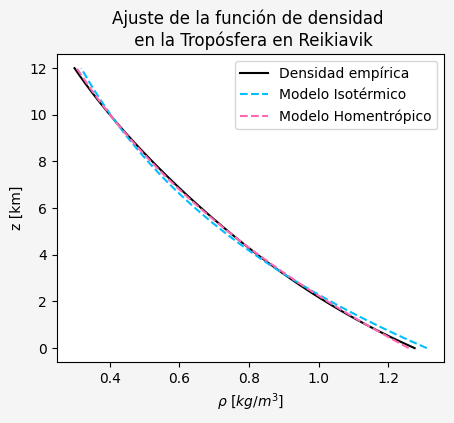

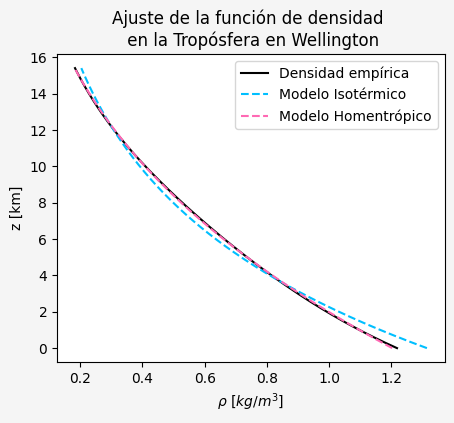

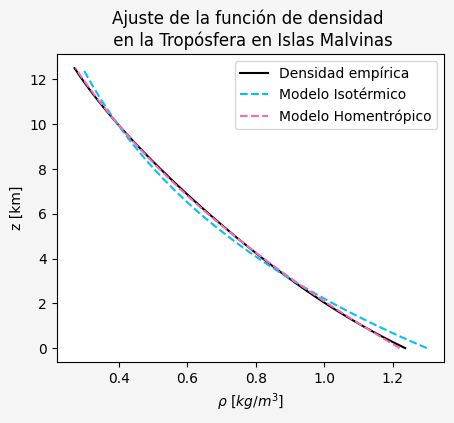

In [ ]:
Reikiavik.grafica_ajuste_densidad("Reikiavik")
Wellington.grafica_ajuste_densidad("Wellington")
Islas_Malvinas.grafica_ajuste_densidad("Islas Malvinas")

Ahora se procede a comparar directamente los valores de $h_0$:

In [ ]:
Medellin_h0 , _ , Mpopt , _ , _ = Medellin.ajuste_tropopausa()
Reikiavik_h0 , _ , Rpopt , _ , _ = Reikiavik.ajuste_tropopausa()
Wellington_h0 , _ , Wpopt , _ , _ = Wellington.ajuste_tropopausa()
Malvinas_h0 , _ , Mapopt , _ , _ = Islas_Malvinas.ajuste_tropopausa()

In [ ]:
#@markdown Texto
print(f"""

__________________________________________

El valor de h₀ ajustado para la tropósfera
según el modelo isotérmico, para las
distintas ciudades es:

          Medellín:       h₀ = {Medellin_h0/1e3:.2f} km
          Reikiavik:      h₀ = {Reikiavik_h0/1e3:.2f} km
          Wellington:     h₀ = {Wellington_h0/1e3:.2f} km
          Islas Mavinas:  h₀ = {Malvinas_h0/1e3:.2f} km

Y según el modelo homentrópico:

          Medellín:       h₀ = {Mpopt[1]/1e3:.2f} km
          Reikiavik:      h₀ = {Rpopt[1]/1e3:.2f} km
          Wellington:     h₀ = {Wpopt[1]/1e3:.2f} km
          Islas Mavinas:  h₀ = {Mapopt[1]/1e3:.2f} km

__________________________________________""")



__________________________________________

El valor de h₀ ajustado para la tropósfera
según el modelo isotérmico, para las
distintas ciudades es:

          Medellín:       h₀ = 9.10 km
          Reikiavik:      h₀ = 8.46 km
          Wellington:     h₀ = 8.26 km
          Islas Mavinas:  h₀ = 8.43 km

Y según el modelo homentrópico:

          Medellín:       h₀ = 9.05 km
          Reikiavik:      h₀ = 8.03 km
          Wellington:     h₀ = 8.25 km
          Islas Mavinas:  h₀ = 7.95 km

__________________________________________


Para éste análisis, se escogieron ubicaciones muy diferentes entre sí, con latitudes norte y sur bastante extremas, sin embargo el valor conseguido para la escala vertical $h_0$ no es muy diferente entre sí, es decir, no hace mayor diferencia que la ubicación esté al norte o al sur, pues para latitudes cercanas a los polos, se consiguen valores numéricos similares y la mayor diferencia se presenta con respecto a lugares cercanos al Ecuador terrestre (en este caso,Medellín) en el que se aprecia que $h_0$ es mayor por menos de un kilometro.

8. ¿Dependerá el valor de $h_0$ de la fecha del año?. Toma 2 ciudades, una cerca al ecuador y otra en una latitud alta (ojalá por encima de los 45 grados de latitud norte o sur) y determina $h_0$ en verano y en invierno (siempre a la misma hora, el medio día) ¿qué observas? ¿cómo lo interpretas?



In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    #En el solsticio de Verano

    Cayambe_Verano = Atmosfera(2023,6,21,zs,0.034,-78.14)     #En Ecuador
    Helsinki_Verano = Atmosfera(2023,6,21,zs,60.19,24.98)   #En Finlandia

    #En el solsticio de Invierno

    Cayambe_Invierno = Atmosfera(2022,12,21,zs,0.034,-78.14)     #En Ecuador
    Helsinki_Invierno = Atmosfera(2022,12,21,zs,60.19,24.98)   #En Finlandia

In [ ]:
C_verano_h0 , _ , CVpopt , _ , _ = Cayambe_Verano.ajuste_tropopausa()
H_verano_h0 , _ , HVpopt , _ , _ = Helsinki_Verano.ajuste_tropopausa()
C_invierno_h0 , _ , CIpopt , _ , _ = Cayambe_Invierno.ajuste_tropopausa()
H_invierno_h0 , _ , HIpopt , _ , _ = Helsinki_Invierno.ajuste_tropopausa()

In [ ]:
#Texto
print(f"""

__________________________________________

El valor de h₀ ajustado para la tropósfera
en Verano:

          Cayambe(isotérmico):       h₀ = {C_verano_h0/1e3:.2f} km
          Helsinki(isotérmico):      h₀ = {H_verano_h0/1e3:.2f} km
          Cayambe(homentrópico):     h₀ = {CVpopt[1]/1e3:.2f} km
          Helsinki(homentrópico):    h₀ = {HVpopt[1]/1e3:.2f} km

En invierno:

          Cayambe(isotérmico):       h₀ = {C_invierno_h0/1e3:.2f} km
          Helsinki(isotérmico):      h₀ = {H_invierno_h0/1e3:.2f} km
          Cayambe(homentrópico):     h₀ = {CIpopt[1]/1e3:.2f} km
          Helsinki(homentrópico):    h₀ = {HIpopt[1]/1e3:.2f} km

__________________________________________""")



__________________________________________

El valor de h₀ ajustado para la tropósfera
en Verano:

          Cayambe(isotérmico):       h₀ = 9.07 km
          Helsinki(isotérmico):      h₀ = 8.41 km
          Cayambe(homentrópico):     h₀ = 9.02 km
          Helsinki(homentrópico):    h₀ = 8.12 km

En invierno:

          Cayambe(isotérmico):       h₀ = 9.14 km
          Helsinki(isotérmico):      h₀ = 6.93 km
          Cayambe(homentrópico):     h₀ = 9.09 km
          Helsinki(homentrópico):    h₀ = 7.84 km

__________________________________________


Se puede notar que la escala $h_0$ varía en función de la latitud en la Tierra, siendo mayor en latitudes próximas al Ecuador, es decir, cerca de $0$ grados. Además, se ha observado que la diferencia entre realizar el ajuste con un modelo isotérmico y uno homentrópico reside en que el último tiene una escala vertical ligeramente más pequeña. Esta diferencia es del orden de varias decenas de metros, y es consistente tanto en invierno como en verano. Sin embargo, no se puede afirmar con certeza cuán significativa será esta diferencia, ya que depende de la eficacia del algoritmo de ajuste utilizado.

9. ¿Dependerá el valor de $h_0$ de la actividad solar?. Toma otras vez las 2 ciudades de 8 y determina el valor de $h_0$ en la fecha del perihelio de un año de mínimo de actividad solar y uno de máximo de actividad solar ¿qué observas?. Repite lo mismo pero comparando la densidad atmosférica a 100 km de altura en ambas fechas ¿hay cambios?


La actividad solar sigue ciclos que duran aproximadamente 11 años, durante los cuales se produce una marcada variación tanto en la cantidad de manchas solares como en la irradiancia solar. El programa del Space Weather Prediction Center de la Administración Nacional Oceánica y Atmosférica proporciona datos precisos sobre la actividad solar a lo largo de los últimos siglos. Como punto de referencia, podemos mencionar el año 1958, que se caracterizó por una alta actividad solar, evidenciada por un mayor número de manchas solares.

Por otro lado, el año 2019 se considera un período de mínimo de actividad solar, y es el más reciente de estos mínimos. Durante este periodo, la actividad solar fue notablemente baja, con menos manchas solares y una menor irradiancia solar.


[1] Solar Cycle Progression. (s.f). Space Weather Prediction Center. https://www.swpc.noaa.gov/products/solar-cycle-progression

A continuación, se tomarán los años previamente mencionados para comprobar los efectos de la actividad solar en el valor ajustado de la escala vertical.

In [ ]:
# Tomando otras dos ciudades distintas en el perihelio

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    #Mínimo Actividad Solar
    Pevek_min = Atmosfera(2019,1,3,zs,69.70,170.27)      #Rusia
    Riau_min  = Atmosfera(2019,1,3,zs,0.071,102.07)      #Indonesia

    #Máximo Actividad Solar
    Pevek_max = Atmosfera(1958,1,3,zs,69.70,170.27)      #Rusia
    Riau_max  = Atmosfera(1958,1,3,zs,0.071,102.07)      #Indonesia

In [ ]:
Pevek_min_h0 , _ , CVpopt , _ , _  = Pevek_min.ajuste_tropopausa()
Riau_min_h0 , _ , HVpopt ,  _ , _  = Riau_min.ajuste_tropopausa()
Pevek_max_h0 , _ , CIpopt , _ , _  = Pevek_max.ajuste_tropopausa()
Riau_max_h0 , _ , HIpopt , _ , _   = Riau_max.ajuste_tropopausa()

In [ ]:
#Texto
print(f"""

__________________________________________

El valor de h₀ ajustado para la tropósfera
en 2019, mínimo de actividad solar:

          Pevek(isotérmico):       h₀ = {Pevek_min_h0/1e3:.2f} km
          Riau(isotérmico):        h₀ = {Riau_min_h0/1e3:.2f} km
          Pevek(homentrópico):     h₀ = {CVpopt[1]/1e3:.2f} km
          Riau(homentrópico):      h₀ = {HVpopt[1]/1e3:.2f} km

en 1958, máximo de actividad solar:

          Pevek(isotérmico):       h₀ = {Pevek_max_h0/1e3:.2f} km
          Riau(isotérmico):        h₀ = {Riau_max_h0/1e3:.2f} km
          Pevek(homentrópico):     h₀ = {CIpopt[1]/1e3:.2f} km
          Riau(homentrópico):      h₀ = {HIpopt[1]/1e3:.2f} km

__________________________________________""")



__________________________________________

El valor de h₀ ajustado para la tropósfera
en 2019, mínimo de actividad solar:

          Pevek(isotérmico):       h₀ = 7.61 km
          Riau(isotérmico):        h₀ = 9.28 km
          Pevek(homentrópico):     h₀ = 7.26 km
          Riau(homentrópico):      h₀ = 9.23 km

en 1958, máximo de actividad solar:

          Pevek(isotérmico):       h₀ = 7.61 km
          Riau(isotérmico):        h₀ = 9.28 km
          Pevek(homentrópico):     h₀ = 7.26 km
          Riau(homentrópico):      h₀ = 9.23 km

__________________________________________


En un primer momento, aparentemente la escala vertical no tiene relación con el momento del ciclo solar específico en el que se analice la atmósfera. Sin embargo, para ampliar los resultados, se procede a graficar la densidad empírica para las dos fechas propuestas.

In [ ]:
P_min_rho_emp = Pevek_min.densidad()
P_max_rho_emp = Pevek_max.densidad()
R_min_rho_emp = Riau_max.densidad()
R_max_rho_emp = Riau_min.densidad()

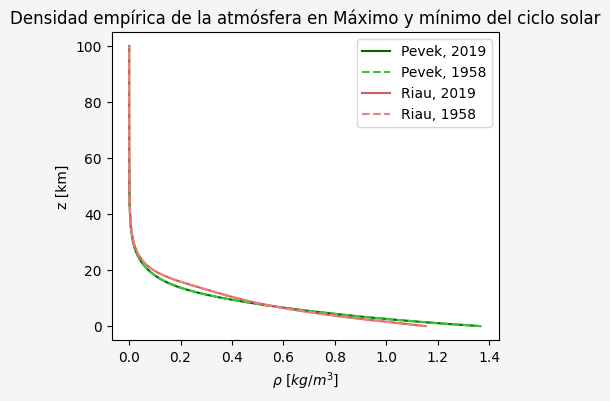

In [ ]:
plt.figure(figsize=(5,4),facecolor="whitesmoke")

plt.plot(P_min_rho_emp*1e3,zs/1e3,"-",
         color = "darkgreen", label = "Pevek, 2019")

plt.plot(P_max_rho_emp*1e3,zs/1e3,"--",
         color = "limegreen", label = "Pevek, 1958")

plt.plot(R_min_rho_emp*1e3,zs/1e3,"-",
         color = "indianred", label = "Riau, 2019")

plt.plot(R_max_rho_emp*1e3,zs/1e3,"--",
         color = "lightcoral", label = "Riau, 1958")

plt.title(f"Densidad empírica de la atmósfera en Máximo y mínimo del ciclo solar")
plt.xlabel(r"$\rho \ [kg / m^3]$")
plt.ylabel("z [km]")
plt.legend()
plt.show()

Como se puede notar, no se encuentra una diferencia entre la densidad empírica según el ciclo solar, pues en ambos casos, el comportamiento solo es determinado por la latitud del lugar.

### **Anexo:** Escala vertical según la latitud del lugar.

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    iso_h0_array=[]
    hom_h0_array=[]

    for lat in np.arange(-90,91,2): #Para analizar todas las latitudes
      atm_ubicacion = Atmosfera(2023,9,12,zs,lat,0.0)
      iso_h0 , _ , hom_popt , _ , _  = atm_ubicacion.ajuste_tropopausa()
      iso_h0_array.append(iso_h0/1e3)
      hom_h0_array.append(hom_popt[1]/1e3)


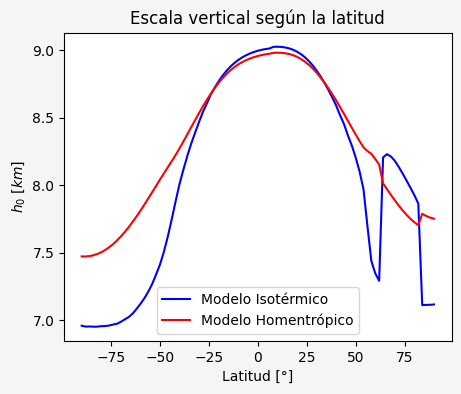

In [ ]:
plt.figure(figsize=(5,4),facecolor="whitesmoke")

plt.plot(np.arange(-90,91,2),iso_h0_array,"-",
         color="blue", label = "Modelo Isotérmico")

plt.plot(np.arange(-90,91,2),hom_h0_array,"-",
         color="red", label = "Modelo Homentrópico")

plt.title(f"Escala vertical según la latitud")
plt.ylabel(r"$h_0 \ [km]$")
plt.xlabel("Latitud [°]")
plt.legend()
plt.show()

De la gráfica anterior, se remarca que la escala vertical está en un rango de 7 a 9 km donde sólo las latitudes más altas (tanto sur como norte) tienen escala vertical más pequeña, esto es, la altura en la atmósfera donde la Presión es nula varía por un par de kilómetros.

El comportamiento extraño presentado entre latitudes de 50° a 75° Norte pueden deberse a fluctuaciones en los datos de la atmósfera estándar.

### **Anexo:** Escala vertical Durante el ciclo solar

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    iso_h0_array=[]
    hom_h0_array=[]

    for year in np.arange(1996,2008,1): #Para analizar todas las latitudes
      atm_ubicacion = Atmosfera(year,9,12,zs,75,0.0)
      iso_h0 , _ , hom_popt , _ , _  = atm_ubicacion.ajuste_tropopausa()
      iso_h0_array.append(iso_h0/1e3)
      hom_h0_array.append(hom_popt[1]/1e3)

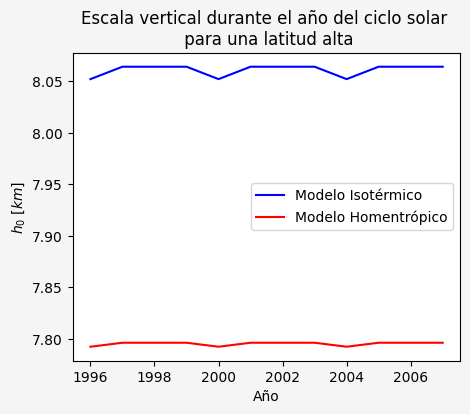

In [ ]:
plt.figure(figsize=(5,4),facecolor="whitesmoke")

plt.plot(np.arange(1996,2008,1),iso_h0_array,"-",
         color="blue", label = "Modelo Isotérmico")

plt.plot(np.arange(1996,2008,1),hom_h0_array,"-",
         color="red", label = "Modelo Homentrópico")

plt.title(f"Escala vertical durante el año del ciclo solar \n para una latitud alta")
plt.ylabel(r"$h_0 \ [km]$")
plt.xlabel("Año")
plt.legend()
plt.show()

Se evidencia que durante el ciclo solar considerado (de 1996 a 2006) no hay cambios notables en $h_0$, por lo que no se puede afirmar que la cantidad de radiación recibida afecte la densidad en la capa más baja de la superficie (la tropósfera).

Además, en este último análisis se puede ver como según el modelo, el ajuste de la escala vertical es mayor o menor, y de modo general, para esta ciudad en latitud 75° Norte, el modelo homentrópico propone que $h_0$ es alrededor de 250 m más pequeño que en el isotérmico.